# Определение перспективного тарифа для телеком-компании
Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

<br> Тариф «Смарт»
<br>Ежемесячная плата: 550 рублей
<br>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
<br>Стоимость услуг сверх тарифного пакета:
<br>минута разговора: 3 рубля
<br>сообщение: 3 рубля
<br>1 Гб интернет-трафика: 200 рублей


<br>Тариф «Ультра»
<br>Ежемесячная плата: 1950 рублей
<br>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
<br>Стоимость услуг сверх тарифного пакета:
<br>минута разговора: 1 рубль
<br>сообщение: 1 рубль
<br>1 Гб интернет-трафика: 150 рублей

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math

# Глобальные переменные

In [ ]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

SMART

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

In [ ]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [ ]:
include_minutes_smart = tariffs.loc[0,'minutes_included']
include_messeges_smart = tariffs.loc[0,'messages_included']
include_traffic_smart = tariffs.loc[0,'mb_per_month_included']/1024

In [ ]:
smart_month_price = tariffs.loc[0,'rub_monthly_fee'] 
smart_call_price = tariffs.loc[0,'rub_per_minute']
smart_messeges_price = tariffs.loc[0,'rub_per_message']
smart_ethernet_price = tariffs.loc[0,'rub_per_gb']

ULTRA

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

In [ ]:
include_minutes_ultra = tariffs.loc[1,'minutes_included']
include_messeges_ultra = tariffs.loc[1,'messages_included']
include_traffic_ultra = tariffs.loc[1,'mb_per_month_included']/1024

In [ ]:
ultra_month_price = tariffs.loc[1,'rub_monthly_fee']
ultra_call_price = tariffs.loc[1,'rub_per_minute']
ultra_messeges_price = tariffs.loc[1,'rub_per_message']
ultra_ethernet_price = tariffs.loc[1,'rub_per_gb']

## Общая информация

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


users['reg_date'],users['churn_date'] - Дата имеет тип object.

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


calls['call_date'] - Дата имеет тип object.

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


internet['session_date'] - Дата имеет тип object. + Unnamed: 0 лишняя колонка

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


messages['message_date '] - Дата имеет тип object.

In [ ]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


#### Поиск дубликатов

In [ ]:
total_nan = users.isna().sum() * 100 / len(users) 
display(total_nan.sort_values()) # Процент пропусков по коллонкам

user_id        0.0
age            0.0
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
churn_date    92.4
dtype: float64

In [ ]:
total_nan = calls.isna().sum() * 100 / len(calls) 
display(total_nan.sort_values()) # Процент пропусков по коллонкам

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [ ]:
total_nan = internet.isna().sum() * 100 / len(internet) 
display(total_nan.sort_values()) # Процент пропусков по коллонкам

id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [ ]:
total_nan = users.isna().sum() * 100 / len(messages) 
display(total_nan.sort_values()) # Процент пропусков по коллонкам

user_id       0.0000
age           0.0000
city          0.0000
first_name    0.0000
last_name     0.0000
reg_date      0.0000
tariff        0.0000
churn_date    0.3755
dtype: float64

Дубликатов как таковых нет. Дублируется только дата прекращения пользования тарифом.

### вывод

Дубликатов нет. Колонки с датой имеют неверный формат.

## Предобработка данных

### users

In [ ]:
users['reg_date']  =  pd.to_datetime(users['reg_date'])
users['churn_date']  =  pd.to_datetime(users['churn_date'])

### calls

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [ ]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

Округлили до целого. Тип int

### internet

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [ ]:
#internet['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int')

In [ ]:
#internet['gb_used'] = (internet['mb_used']/1024).apply(np.ceil).astype('int')

In [ ]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Округлил мегабайты до гигабайт как указано в задаче. Поместил в отдельную колонку

### messages

In [ ]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

## Подготовка данных:

Отделим юзеров по тарифу в два разных df

In [ ]:
#users_smart = users.loc[users['tariff'] == 'smart']
#users_ultra = users.loc[users['tariff'] == 'ultra']

### Количество сделанных звонков и израсходованных минут разговора по месяцам;

Добавляем колонку с месяцем в таблицу звонков.

In [ ]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [ ]:
messages['month']

0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: month, Length: 123036, dtype: int64

Считаем расход минут на каждого юзера по месяцам.

In [ ]:
calls_pivot_month = pd.pivot_table(calls, values = ['duration'],index=['month','user_id'], aggfunc='sum')
calls_pivot_month

duration
month user_id          
1     1005           95
      1032          380
      1045            9
      1055          551
      1071          194
...                 ...
12    1494          418
      1495         1031
      1496          518
      1497          545
      1499          492

[3174 rows x 1 columns]

### Количество отправленных сообщений по месяцам

In [ ]:
messeges_pivot_month = pd.pivot_table(messages,index=['month','user_id'], values='message_date', aggfunc='count')
messeges_pivot_month

message_date
month user_id              
1     1005                7
      1032               38
      1045                5
      1055               30
      1071               16
...                     ...
12    1493               78
      1495               84
      1496               51
      1497               17
      1499               66

[2717 rows x 1 columns]

### объем израсходованного интернет-трафика по месяцам

In [ ]:
internet_pivot_month = pd.pivot_table(internet,index=['month','user_id'],values='mb_used', aggfunc='sum')
internet_pivot_month['gb_used'] = (internet_pivot_month['mb_used']/1024).apply(np.ceil).astype('int')
internet_pivot_month

mb_used  gb_used
month user_id                   
1     1005      2727.97        3
      1032     24127.69       24
      1045      2346.71        3
      1055     17090.88       17
      1071     15604.34       16
...                 ...      ...
12    1494     17621.21       18
      1495     23426.76       23
      1496     20736.15       21
      1497     19918.60       20
      1499     13055.58       13

[3203 rows x 2 columns]

### Помесячная выручка с каждого пользователя.

Делаем одну таблицу из 3х.

In [ ]:
final_df = internet_pivot_month.join(messeges_pivot_month,how='outer').join(calls_pivot_month,how='outer')

final_df = final_df.fillna(0)
final_df = final_df.reset_index()

In [ ]:
final_df

,month,user_id,mb_used,gb_used,message_date,duration
0,1,1005,2727.97,3.0,7.0,95.0
1,1,1032,24127.69,24.0,38.0,380.0
2,1,1045,2346.71,3.0,5.0,9.0
3,1,1055,17090.88,17.0,30.0,551.0
4,1,1071,15604.34,16.0,16.0,194.0
...,...,...,...,...,...,...
3209,12,1494,17621.21,18.0,0.0,418.0
3210,12,1495,23426.76,23.0,84.0,1031.0
3211,12,1496,20736.15,21.0,51.0,518.0
3212,12,1497,19918.60,20.0,17.0,545.0


In [ ]:
final_df['user_id'].nunique()

498

2х пользователей нет ни в одной из таблиц.

In [ ]:
final_df

,month,user_id,mb_used,gb_used,message_date,duration
0,1,1005,2727.97,3.0,7.0,95.0
1,1,1032,24127.69,24.0,38.0,380.0
2,1,1045,2346.71,3.0,5.0,9.0
3,1,1055,17090.88,17.0,30.0,551.0
4,1,1071,15604.34,16.0,16.0,194.0
...,...,...,...,...,...,...
3209,12,1494,17621.21,18.0,0.0,418.0
3210,12,1495,23426.76,23.0,84.0,1031.0
3211,12,1496,20736.15,21.0,51.0,518.0
3212,12,1497,19918.60,20.0,17.0,545.0


Сделал датафрейм где по месяцам прописанны все данные + добавлен тариф для каждого пользователя и город.

In [ ]:
final_df = final_df.merge(users[['user_id','tariff','city']],on='user_id', how='left')

Считаем то что выходит за лимиты в рублях.

Сообщения:

In [ ]:
final_df.loc[final_df['tariff'] == 'smart', 'message_limit'] = (final_df['message_date'] - include_messeges_smart) * smart_messeges_price
final_df.loc[final_df['tariff'] == 'ultra', 'message_limit'] = (final_df['message_date'] - include_messeges_ultra) * ultra_messeges_price
final_df.loc[final_df['message_limit'] < 0, 'message_limit'] = 0

Минуты разговора:

In [ ]:
final_df.loc[final_df['tariff'] == 'smart', 'calls_limit'] = (final_df['duration'] - include_minutes_smart) * smart_call_price
final_df.loc[final_df['tariff'] == 'ultra', 'calls_limit'] = (final_df['duration'] - include_minutes_ultra) * ultra_call_price
final_df.loc[final_df['calls_limit'] < 0, 'calls_limit'] = 0

Интернет:

In [ ]:
final_df.loc[final_df['tariff'] == 'smart', 'gb_limit'] = (final_df['gb_used'] - include_traffic_smart) * smart_ethernet_price
final_df.loc[final_df['tariff'] == 'ultra', 'gb_limit'] = (final_df['gb_used'] - include_traffic_ultra) * ultra_ethernet_price
final_df.loc[final_df['gb_limit'] < 0, 'gb_limit'] = 0

Заполняем пропуски нулем.

In [ ]:
final_df = final_df.fillna(0)

Считаем выручку для каждого пользователя по месяцам.

In [ ]:
final_df['tariff_month_price'] = np.where(final_df['tariff'] == 'smart', smart_month_price, ultra_month_price)
final_df['revenu'] = final_df['tariff_month_price'] + final_df['gb_limit'] + final_df['message_limit'] + final_df['calls_limit']

In [ ]:
final_df

,month,user_id,mb_used,gb_used,message_date,duration,tariff,city,message_limit,calls_limit,gb_limit,tariff_month_price,revenu
0,1,1005,2727.97,3.0,7.0,95.0,smart,Набережные Челны,0.0,0.0,0.0,550,550.0
1,1,1032,24127.69,24.0,38.0,380.0,smart,Ульяновск,0.0,0.0,1800.0,550,2350.0
2,1,1045,2346.71,3.0,5.0,9.0,smart,Улан-Удэ,0.0,0.0,0.0,550,550.0
3,1,1055,17090.88,17.0,30.0,551.0,smart,Казань,0.0,153.0,400.0,550,1103.0
4,1,1071,15604.34,16.0,16.0,194.0,smart,Омск,0.0,0.0,200.0,550,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,12,1494,17621.21,18.0,0.0,418.0,smart,Омск,0.0,0.0,600.0,550,1150.0
3210,12,1495,23426.76,23.0,84.0,1031.0,ultra,Иркутск,0.0,0.0,0.0,1950,1950.0
3211,12,1496,20736.15,21.0,51.0,518.0,smart,Вологда,3.0,54.0,1200.0,550,1807.0
3212,12,1497,19918.60,20.0,17.0,545.0,smart,Челябинск,0.0,135.0,1000.0,550,1685.0


In [ ]:
smart_users = final_df.loc[final_df['tariff'] == 'smart']
smart_users['user_id'].nunique()

350

In [ ]:
ultra_users = final_df.loc[final_df['tariff'] == 'ultra']
ultra_users['user_id'].nunique()

148

## Анализ данных:

### Интернет

In [ ]:
final_df

,month,user_id,mb_used,gb_used,message_date,duration,tariff,city,message_limit,calls_limit,gb_limit,tariff_month_price,revenu
0,1,1005,2727.97,3.0,7.0,95.0,smart,Набережные Челны,0.0,0.0,0.0,550,550.0
1,1,1032,24127.69,24.0,38.0,380.0,smart,Ульяновск,0.0,0.0,1800.0,550,2350.0
2,1,1045,2346.71,3.0,5.0,9.0,smart,Улан-Удэ,0.0,0.0,0.0,550,550.0
3,1,1055,17090.88,17.0,30.0,551.0,smart,Казань,0.0,153.0,400.0,550,1103.0
4,1,1071,15604.34,16.0,16.0,194.0,smart,Омск,0.0,0.0,200.0,550,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,12,1494,17621.21,18.0,0.0,418.0,smart,Омск,0.0,0.0,600.0,550,1150.0
3210,12,1495,23426.76,23.0,84.0,1031.0,ultra,Иркутск,0.0,0.0,0.0,1950,1950.0
3211,12,1496,20736.15,21.0,51.0,518.0,smart,Вологда,3.0,54.0,1200.0,550,1807.0
3212,12,1497,19918.60,20.0,17.0,545.0,smart,Челябинск,0.0,135.0,1000.0,550,1685.0


Считаем среднее для 3х параметров.

In [ ]:
smart = final_df.loc[final_df['tariff'] == 'smart']
ultra = final_df.loc[final_df['tariff'] == 'ultra']

In [ ]:
smart_gb_pivot = pd.pivot_table(smart, values = ['gb_used'],index=['month','user_id','city'], aggfunc='sum')
ultra_gb_pivot = pd.pivot_table(ultra, values = ['gb_used'],index=['month','user_id','city'], aggfunc='sum')

Дисперсия совокупности тарифа smart: 12.22647033852252
Cтандартное отклонение тарифа smart 3.496637004111596
Дисперсия совокупности тарифа ultra: 65.42632506451598
Cтандартное отклонение тарифа ultra 8.088654094750002


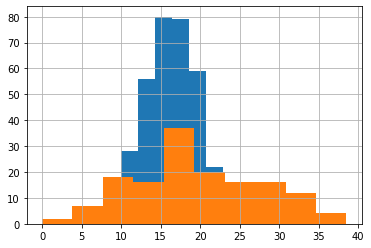

In [ ]:
smart_gb_mean = smart_gb_pivot.groupby('user_id')['gb_used'].mean()
smart_gb_mean.hist()
ultra_gb_mean = ultra_gb_pivot.groupby('user_id')['gb_used'].mean()
ultra_gb_mean.hist()


variance_smart = np.var(smart_gb_mean)
print('Дисперсия совокупности тарифа smart:',variance_smart)
standard_deviatio_smart = np.std(smart_gb_mean)
print('Cтандартное отклонение тарифа smart',standard_deviatio_smart)

variance_ultra = np.var(ultra_gb_mean)
print('Дисперсия совокупности тарифа ultra:',variance_ultra)
standard_deviatio_ultra = np.std(ultra_gb_mean)
print('Cтандартное отклонение тарифа ultra',standard_deviatio_ultra)

15.19872845502155


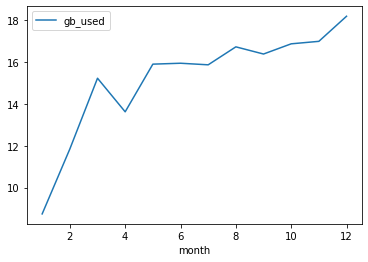

In [ ]:
smart_gb_pivot_mounth = pd.pivot_table(smart, values = ['gb_used'],index=['month'], aggfunc='mean')
smart_gb_pivot_mounth.plot()
print(smart_gb_pivot_mounth['gb_used'].mean())

In [ ]:
smart_gb_pivot_mounth['adv_gb'] = smart_gb_pivot_mounth['gb_used'] + standard_deviatio_smart * 3
smart_gb_pivot_mounth['adv_gb'].mean()

25.68863946735634

По всем месяцам в среднем чтобы всем юзерам тарифа smart хватало интернета нужно около 25 гб.

18.25893661289434


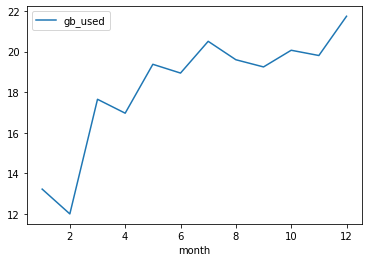

In [ ]:
ultra_gb_pivot = pd.pivot_table(ultra, values = ['gb_used'],index=['month'], aggfunc='mean')
ultra_gb_pivot.plot()
print(ultra_gb_pivot['gb_used'].mean())

В среднем для каждого юзера тарифа смарт требуется 15 гб, для ультра это 18 гб что укладывается в лимит по обоим тарифам.
Потребление трафика к концу года имеет тенденцию к росту.

Нормальное распределние.

#### Средняя выручка

In [ ]:
smart_int = smart['gb_limit'].mean()
smart_int

597.7568416330192

In [ ]:
ultra_int = ultra['gb_limit'].mean()
ultra_int

120.15228426395939

### Сообщения

In [ ]:
smart_messeges_pivot = pd.pivot_table(smart, values = ['message_date'],index=['month','user_id','city'], aggfunc='sum')
ultra_messeges_pivot = pd.pivot_table(ultra, values = ['message_date'],index=['month','user_id','city'], aggfunc='sum')

Дисперсия совокупности тарифа smart: 700.9015956121176
Cтандартное отклонение тарифа smart 26.474546183308178
Дисперсия совокупности тарифа ultra: 2135.302923096238
Cтандартное отклонение тарифа ultra 46.209338050833814


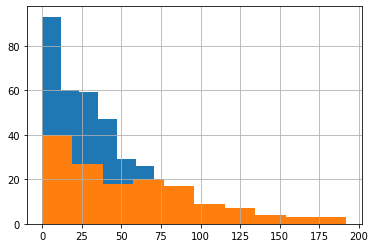

In [ ]:
smart_messeges_mean = smart_messeges_pivot.groupby('user_id')['message_date'].mean()
smart_messeges_mean.hist()

ultra_messeges_mean = ultra_messeges_pivot.groupby('user_id')['message_date'].mean()
ultra_messeges_mean.hist()


variance_smart = np.var(smart_messeges_mean)
print('Дисперсия совокупности тарифа smart:',variance_smart)
standard_deviatio_smart = np.std(smart_messeges_mean)
print('Cтандартное отклонение тарифа smart',standard_deviatio_smart)


variance_ultra = np.var(ultra_messeges_mean)
print('Дисперсия совокупности тарифа ultra:',variance_ultra)
standard_deviatio_ultra = np.std(ultra_messeges_mean)
print('Cтандартное отклонение тарифа ultra',standard_deviatio_ultra)

Распределение со смещением влево

31.413210661085547


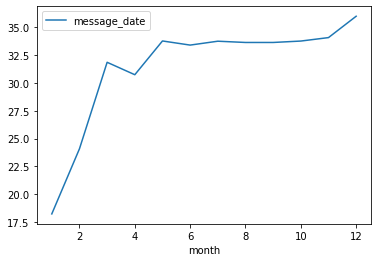

In [ ]:
smart_messeges_pivot_mounth = pd.pivot_table(smart, values = ['message_date'],index=['month'], aggfunc='mean')
smart_messeges_pivot_mounth.plot()
print(smart_messeges_pivot_mounth['message_date'].mean())

43.71498284147191


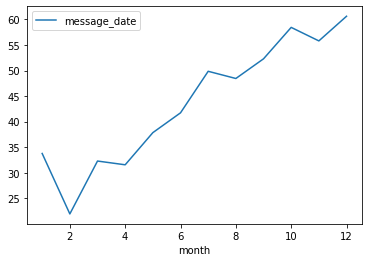

In [ ]:
ultra_messeges_pivot_mounth = pd.pivot_table(ultra, values = ['message_date'],index=['month'], aggfunc='mean')
ultra_messeges_pivot_mounth.plot()
print(ultra_messeges_pivot_mounth['message_date'].mean())

В среднем для каждого юзера тарифа смарт требуется 31 сообщение и 43 для тарифа ультра что укладывается в лимит.
В тарифе смарт на во второй половине года нет никаких тендеций и количество сообщений соответвует своему среднему значению за весь год.
В тарифе ульта есть выраженная тендеция к увеличению количества смс в течении года, В феврале отправляли минимальное количество смс. Тенденция аналогичная трафику

### Минуты разговора

In [ ]:
smart_calls_pivot = pd.pivot_table(smart, values = ['duration'],index=['month','user_id','city'], aggfunc='sum')
ultra_calls_pivot = pd.pivot_table(ultra, values = ['duration'],index=['month','user_id','city'], aggfunc='sum')

Дисперсия совокупности тарифа smart: 20974.051039437672
Cтандартное отклонение тарифа smart 144.8242073668545
Дисперсия совокупности тарифа ultra: 78867.04136496516
Cтандартное отклонение тарифа ultra 280.8327640517843


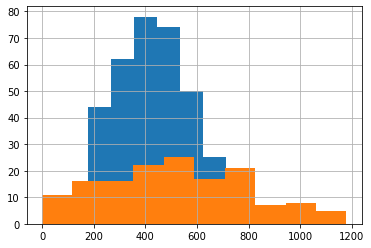

In [ ]:
smart_calls_mean = smart_calls_pivot.groupby('user_id')['duration'].mean()
smart_calls_mean.hist()

ultra_calls_mean = ultra_calls_pivot.groupby('user_id')['duration'].mean()
ultra_calls_mean.hist()


variance_smart = np.var(smart_calls_mean)
print('Дисперсия совокупности тарифа smart:',variance_smart)
standard_deviatio_smart = np.std(smart_calls_mean)
print('Cтандартное отклонение тарифа smart',standard_deviatio_smart)


variance_ultra = np.var(ultra_calls_mean)
print('Дисперсия совокупности тарифа ultra:',variance_ultra)
standard_deviatio_ultra = np.std(ultra_calls_mean)
print('Cтандартное отклонение тарифа ultra',standard_deviatio_ultra)

386.76049870568664


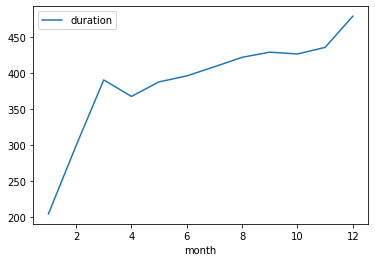

In [ ]:
smart_calls_pivot_mounth = pd.pivot_table(smart, values = ['duration'],index=['month'], aggfunc='mean')
smart_calls_pivot_mounth.plot()
print(smart_calls_pivot_mounth['duration'].mean())

495.9343101624627


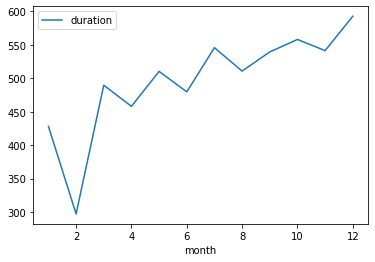

In [ ]:
ultra_calls_pivot_mounth = pd.pivot_table(ultra, values = ['duration'],index=['month'], aggfunc='mean')
ultra_calls_pivot_mounth.plot()
print(ultra_calls_pivot_mounth['duration'].mean())

Распределенние нормальное.

В среднем для каждого юзера тарифа смарт требуется 386 минут разговора и 495 минут для тарифа ultra. что укладывается в лимит.

### вывод

По обом тарифам в среднем люди стараются не превышать лимиты по всем 3м метрикам.

## Проверьте гипотезы

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

In [ ]:
smart['revenu'].mean()

1289.9735307312696

In [ ]:
ultra['revenu'].mean()

2070.1522842639592

<AxesSubplot:>

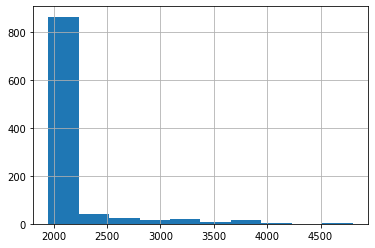

In [ ]:
ultra['revenu'].hist()

<AxesSubplot:>

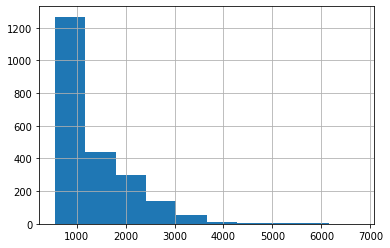

In [ ]:
smart['revenu'].hist()

<br> H₀: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны
<br>H₁: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Посмотрим на дисперсии:

In [ ]:
ultra['revenu']
standard_deviation = np.std(ultra['revenu'])
standard_deviation

375.9961080333192

In [ ]:
smart['revenu']
standard_deviation = np.std(smart['revenu'])
standard_deviation

818.2207653949051

Они различается по этому ставим параметр equal_var=False

In [ ]:
ultra = ultra['revenu']

smart = smart['revenu']

alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(
    ultra, 
    smart,equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


#### Вывод

Гипотиза за о то что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна отвергается.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<br> H₀: Средняя выручка пользователей из Москвы равна средней выручки в других регионах.
<br>H₁: Средняя выручка пользователей из Москвы не равна средней выручки в других регионах.

In [ ]:
moscow = final_df.query('city == "Москва"')
moscow['revenu'].mean()

1546.7135842880523

In [ ]:
other = final_df.query('city != "Москва"')
other['revenu'].mean()

1524.9362274298885

In [ ]:
moscow = moscow['revenu']
other = other['revenu']

alpha = .01 # критический уровень статистической значимости

results = st.ttest_ind(moscow, other)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


H₀: Средняя выручка пользователей из Москвы равна средней выручки в других регионах.

#### Вывод

Гипотиза о то что средняя выручка пользователей из Москвы равна средней выручки в других регионах подтверждается.

## Общий вывод

<br>Средняя выручка на тарифе smart существенно выше. 
1. Мы выяснили следующее:
1. Колличество пользователей тарифом smart выше чем ultra.
1. Пользователи тарифа smart склонны переплачивать за интернет так как выручка по интернету существенно выше.
1. В среднем по всему году для тарифа smart нужно 15 гб интренета для каждого пользователя что укладывается в лимит по тарифу.
1. Среднее потребление  интернет трафика укладывается в лимит по обоим тарифам.
1. Среднее количество смс укладывается в лимит по обоим тарифам.
1. Среднее количество минут разговора укладывается в лимит по обоим тарифам.
1. Средняя выручка между Москвой и другими городами существенно не отличается.
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна.



Почему тариф Smart выгоднее чем Ultra?
<br> Тарифом smart пользуется существенно больше людей.Они склонны переплачивать за интернет, По правилу трёх сигм, комфортный трафик для всего тарифа smart будет 25гб для всего года по каждому пользователю.
<br>Средняя выручка по интернету тарифа Smart выше в 5 раз, чем в ultra.
<br>Общая выручка судя по имеющимся данным выше у тарифа ultra, это объясняется малым количеством пользователей этого тарифа.

<br>Средняя выручка по обоим тарифам между Москвой и другими регионами отличается но не сильно.
По обоим тарифам есть тенденция на увеличение потребления интернета, звонками к концу года.